# Predicting the price of Electric Cars

This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL).

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

/Users/macy/.virtual-envs/ml-venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2: Load and Explore Data

In [2]:
cars_df = pd.read_csv('datasets/Electric_cars_dataset.csv')
cars_df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [3]:
df = cars_df.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head(1)

,id,vin_(1-10),county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price_($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50


In [5]:
df.rename(columns={
    'vin_(1-10)': 'vin',
    'clean_alternative_fuel_vehicle_(cafv)_eligibility': 'clean_alternative_fuel_vehicle_eligibility',
    'expected_price_($1k)':'expected_price'
},inplace=True)

In [6]:
df.head(1)

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50


In [7]:
df.shape

(64353, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          64353 non-null  object 
 1   vin                                         64353 non-null  object 
 2   county                                      64349 non-null  object 
 3   city                                        64344 non-null  object 
 4   state                                       64342 non-null  object 
 5   zip_code                                    64347 non-null  float64
 6   model_year                                  64346 non-null  float64
 7   make                                        64349 non-null  object 
 8   model                                       64340 non-null  object 
 9   electric_vehicle_type                       64353 non-null  object 
 10  clean_alte

In [9]:
df.describe(include='all')

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV33174,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

id                                              0
vin                                             0
county                                          4
city                                            9
state                                          11
zip_code                                        6
model_year                                      7
make                                            4
model                                          13
electric_vehicle_type                           0
clean_alternative_fuel_vehicle_eligibility      0
electric_range                                  0
base_msrp                                       0
legislative_district                          169
dol_vehicle_id                                  0
vehicle_location                              510
electric_utility                              722
expected_price                                  0
dtype: int64

* There are 64353 rows and 18 columns in the dataset
* 12 columns are categorical with 6 being numerical
* There's missing values on the country, city, state, zip_code, model_year, make, model, legislative_district, vehicle_location and electric_utility

In [12]:
# Create a y_data_profiling report
profile = ProfileReport(df, title='Electric Cars in Washington State Department of Licensing Report')

In [13]:
#profile.to_file(output_file='profile-report.html')

### Step 3: Data Cleaning

#### Handling missing county values

In [14]:
missing_counties = df[df.county.isnull()]
missing_counties

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
2195,EV45994,5YJ3E1EB1J,NaN,APO,AE,9751.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,475911509,NaN,NaN,69
5913,EV39990,1C4JJXR67M,NaN,FPO,AP,96349.0,2021.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,187228030,NaN,NaN,40
40262,EV7503,1G1RA6E49F,NaN,FPO,AP,96678.0,2015.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,232819723,NaN,NaN,18.5
52218,EV69,1FADP5FU6H,NaN,FPO,AP,96662.0,2017.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,NaN,138149357,NaN,NaN,21


In [15]:
df[(df.city == 'APO') & (df.state == 'AE')]

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
2195,EV45994,5YJ3E1EB1J,NaN,APO,AE,9751.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,475911509,NaN,NaN,69


In [16]:
df[(df.city == 'FPO') & (df.state == 'AP')]

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
5913,EV39990,1C4JJXR67M,NaN,FPO,AP,96349.0,2021.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,187228030,NaN,NaN,40
40262,EV7503,1G1RA6E49F,NaN,FPO,AP,96678.0,2015.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,232819723,NaN,NaN,18.5
52218,EV69,1FADP5FU6H,NaN,FPO,AP,96662.0,2017.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,NaN,138149357,NaN,NaN,21


- Given there isn't much information about the names of the missing counties and the zipcodes not returning any data in Washington, let's remove them from our dataset
- We'll reference this [site](https://ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?ClientCode=capitolimpact) to confirm the county and state details

In [17]:
df.dropna(subset=['county'],inplace=True)

In [18]:
df.county.isnull().sum()

np.int64(0)

#### Handling missing city values

In [19]:
missing_cities = df[df.city.isnull()]
missing_cities

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
19972,EV205,1N4AZ0CP6F,King,NaN,WA,98052.0,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,45.0,184161785,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),25
20771,EV197,1FADP5CU8F,Thurston,NaN,WA,98502.0,2015.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,140718749,POINT (-122.979969 47.078241),PUGET SOUND ENERGY INC,17
31044,EV203,KNDCB3LC7H,Kitsap,NaN,WA,98346.0,2017.0,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,248819098,POINT (-122.526506 47.81346),PUGET SOUND ENERGY INC,29.998
40073,EV208,1G1FZ6S02K,Thurston,NaN,WA,98502.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35.0,297328223,POINT (-122.979969 47.078241),PUGET SOUND ENERGY INC,41.78
44039,EV201,YV4BC0PL3H,Kitsap,NaN,WA,98312.0,2017.0,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,35.0,216744118,POINT (-122.724682 47.57271),PUGET SOUND ENERGY INC,46.745
46249,EV206,3FA6P0SU6G,Thurston,NaN,WA,98513.0,2016.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,2.0,475016139,POINT (-122.751179 47.002092),PUGET SOUND ENERGY INC,20
53617,EV207,JTDKARFP4H,Yakima,NaN,WA,98908.0,2017.0,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,265119802,POINT (-120.646044 46.609142),NaN,28
56403,EV200,5YJ3E1EB4L,King,NaN,WA,98052.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,48.0,5006942,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),50
64187,EV202,JTDKARFP6J,King,NaN,WA,98008.0,2018.0,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,48.0,122110054,POINT (-122.117365 47.609515),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),30


In [20]:
missing_cities.zip_code.unique()

array([98052., 98502., 98346., 98312., 98513., 98908., 98008.])

In [21]:
df.loc[missing_cities[missing_cities.zip_code == 98052.0].index, 'city'] = 'Redmond'
df.loc[missing_cities[missing_cities.zip_code == 98502.0].index, 'city'] = 'Olympia'
df.loc[missing_cities[missing_cities.zip_code == 98346.0].index, 'city'] = 'Kingston'
df.loc[missing_cities[missing_cities.zip_code == 98312.0].index, 'city'] = 'Bremerton'
df.loc[missing_cities[missing_cities.zip_code == 98513.0].index, 'city'] = 'Lacey'
df.loc[missing_cities[missing_cities.zip_code == 98908.0].index, 'city'] = 'Yakima'
df.loc[missing_cities[missing_cities.zip_code == 98008.0].index, 'city'] = 'Bellevue'

In [22]:
df.city.isnull().sum()

np.int64(0)

#### Handling missing state values

In [23]:
missing_states = df[df.state.isnull()]
missing_states

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
820,EV235,1N4AZ0CP8E,Snohomish,EDMONDS,NaN,98020.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,32.0,109001532,POINT (-122.370709 47.801416),PUGET SOUND ENERGY INC,19
2520,EV237,1N4AZ1CP6J,Anchorage,CHUGIAK,NaN,99567.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,NaN,311948836,POINT (-149.425108 61.41463),NaN,21
6358,EV232,KNDJP3AE3J,Thurston,LACEY,NaN,98503.0,2018.0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,111,33950,2.0,135658435,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,16.251
35043,EV229,1N4AZ1CP1L,Snohomish,BOTHELL,NaN,98012.0,2020.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149,0,1.0,141325628,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,40
35276,EV238,1N4AZ0CP8D,King,SEATTLE,NaN,98107.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,43.0,212078681,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),18
35944,EV230,5YJYGDEFXL,Kitsap,BAINBRIDGE ISLAND,NaN,98110.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,23.0,107236958,POINT (-122.534497 47.643688),PUGET SOUND ENERGY INC,72
41173,EV231,5YJSA1E20G,Yakima,YAKIMA,NaN,98901.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,15.0,196516400,POINT (-120.441155 46.626077),NaN,65
45990,EV228,1N4AZ0CP2D,King,VASHON,NaN,98070.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,34.0,252897970,POINT (-122.469161 47.415443),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),18
52823,EV234,KNDCC3LGXL,Kitsap,BREMERTON,NaN,98310.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,23.0,152551234,POINT (-122.623208 47.590898),PUGET SOUND ENERGY INC,33
54532,EV233,3FA6P0SU2G,Thurston,LACEY,NaN,98516.0,2016.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,111939852,POINT (-122.781876 47.089772),PUGET SOUND ENERGY INC,20


In [24]:
df.state.unique()

array(['WA', 'NC', 'CA', nan, 'PA', 'IL', 'NM', 'NY', 'MD', 'VA', 'HI',
       'CT', 'GA', 'TN', 'TX', 'DC', 'MS', 'RI', 'NE', 'NV', 'IN', 'WY',
       'NJ', 'DE', 'KS', 'AK', 'OR', 'FL', 'PR', 'MA', 'MO', 'SD', 'MT',
       'UT', 'LA', 'WI', 'AZ'], dtype=object)

In [25]:
missing_states.zip_code.unique()

array([98020., 99567., 98503., 98012., 98107., 98110., 98901., 98070.,
       98310., 98516., 98118.])

In [26]:
df.loc[missing_states[missing_states.zip_code == 98020.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 99567.0].index, 'state'] = 'AK' # Code for Alaska
df.loc[missing_states[missing_states.zip_code == 98503.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98012.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98107.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98110.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98901.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98070.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98310.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98516.0].index, 'state'] = 'WA'
df.loc[missing_states[missing_states.zip_code == 98118.0].index, 'state'] = 'WA'

In [27]:
df.state.isnull().sum()

np.int64(0)

#### Handling missing zipcode values

In [28]:
missing_zipcodes = df[df.zip_code.isnull()]
missing_zipcodes

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
19261,EV245,1FADP5CU5D,King,SEATTLE,WA,NaN,2013.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,34.0,6376009,POINT (-122.374864 47.548552),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),14.5
34042,EV242,5YJSA1E49K,Spokane,SPOKANE VALLEY,WA,NaN,2019.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,4.0,315032728,NaN,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,82.5
35436,EV247,WBY8P4C08L,King,SEATTLE,WA,NaN,2020.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,36.0,139867017,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),42
36455,EV246,KNAGV4LD1J,Snohomish,BOTHELL,WA,NaN,2018.0,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,269080479,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,20.004
39475,EV243,1G1RB6E44C,Snohomish,SNOHOMISH,WA,NaN,2012.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,44.0,223531472,POINT (-122.029605 47.939428),PUGET SOUND ENERGY INC,16
54190,EV241,5YJ3E1EB7L,Kitsap,BAINBRIDGE ISLAND,WA,NaN,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,23.0,124504691,POINT (-122.534497 47.643688),PUGET SOUND ENERGY INC,50


In [29]:
df.loc[missing_zipcodes[missing_zipcodes.county == 'King'].index, 'zip_code'] = 98063.0
df.loc[missing_zipcodes[missing_zipcodes.county == 'Spokane'].index, 'zip_code'] = 99020.0
df.loc[missing_zipcodes[missing_zipcodes.county == 'Snohomish'].index, 'zip_code'] = 98046.0
df.loc[missing_zipcodes[missing_zipcodes.county == 'Kitsap'].index, 'zip_code'] = 98364.0

In [30]:
df.zip_code.isnull().sum()

np.int64(0)

#### Handling missing model_year values

In [31]:
df.model_year.nunique(), df.model_year.unique()

(19,
 array([2020., 2011., 2015., 2013., 2019., 2016., 2017., 2021., 2022.,
        2018., 2014., 2012., 2008., 2010., 1993., 2000.,   nan, 2002.,
        1999., 1998.]))

In [32]:
missing_model_years = df[df.model_year.isnull()]
missing_model_years

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
18618,EV258,KMHE34L17G,Spokane,SPOKANE VALLEY,WA,99016.0,NaN,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,4.0,476776030,POINT (-117.152872 47.645579),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,16.365
34663,EV255,5YJ3E1EB6K,King,SEATTLE,WA,98115.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,46.0,192220731,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),57
35578,EV250,5YJSA1CP9D,Clark,VANCOUVER,WA,98683.0,NaN,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,17.0,193870848,POINT (-122.510748 45.603727),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,33.89
50803,EV252,5YJYGDEF0L,Chelan,WENATCHEE,WA,98801.0,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,12.0,127404371,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,72
54860,EV249,WAUTPBFF2G,Snohomish,EDMONDS,WA,98026.0,NaN,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,21.0,165842008,POINT (-122.333046 47.829439),PUGET SOUND ENERGY INC,18.86
59409,EV256,5YJ3E1EB0M,Clark,CAMAS,WA,98607.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,169660508,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,64
62552,EV253,5YJ3E1EA2M,King,SEATTLE,WA,98144.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,150168735,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64


In [33]:
df[(df.make == 'HYUNDAI') & (df.model == 'SONATA PLUG-IN HYBRID')].model_year.unique()

array([2016.,   nan])

Fill in the missing model_year based on the model_year values of the other non-empty dataset

In [34]:
# Model year for make hyundai and model sonata plug in hybrid
df.loc[missing_model_years[(missing_model_years.make == 'HYUNDAI') & (missing_model_years.model == 'SONATA PLUG-IN HYBRID')].index, 'model_year'] = 2016

In [35]:
df[(df.make == 'TESLA') & (df.model == 'MODEL 3') & (df.electric_range == 220)].model_year.unique()

array([2019., 2017.,   nan])

In [36]:
# Model year for make tesla and model 3 with electric range 220
df.loc[missing_model_years[(missing_model_years.make == 'TESLA') & (missing_model_years.model == 'MODEL 3')].index, 'model_year'] = 2019

In [37]:
df[(df.make == 'TESLA') & (df.model == 'MODEL S') & (df.electric_range == 208)].model_year.unique()

array([2013., 2015., 2014.,   nan])

In [38]:
# Model year for make tesla and model S with electric range 208
df.loc[missing_model_years[(missing_model_years.make == 'TESLA') & (missing_model_years.model == 'MODEL S')].index, 'model_year'] = 2015

In [39]:
df[(df.make == 'TESLA') & (df.model == 'MODEL Y') & (df.electric_range == 291)].model_year.unique()

array([2020.,   nan])

In [40]:
# Model year for make tesla and model Y with electric range 291
df.loc[missing_model_years[(missing_model_years.make == 'TESLA') & (missing_model_years.model == 'MODEL Y')].index, 'model_year'] = 2020

In [41]:
df[(df.make == 'AUDI') & (df.model == 'A3') & (df.electric_vehicle_type == 'Plug-in Hybrid Electric Vehicle (PHEV)')].model_year.unique()

array([2017., 2018., 2016.,   nan])

In [42]:
# Model year for make AUDI and A3
df.loc[missing_model_years[(missing_model_years.make == 'AUDI') & (missing_model_years.model == 'A3')].index, 'model_year'] = 2016

In [43]:
df.model_year.isnull().sum()

np.int64(0)

#### Handling missing make values

In [44]:
missing_make = df[df.make.isnull()]
missing_make

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
23333,EV270,JN1AZ0CP4C,Thurston,OLYMPIA,WA,98501.0,2012.0,NaN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,35.0,207980454,POINT (-122.874042 46.998873),PUGET SOUND ENERGY INC,17
27605,EV273,5YJ3E1EA7M,King,NEWCASTLE,WA,98059.0,2021.0,NaN,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,181324650,POINT (-122.132064 47.494834),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),64
55367,EV274,KNDCD3LD2M,Whatcom,BELLINGHAM,WA,98229.0,2021.0,NaN,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,40.0,170467937,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,24.69
59308,EV271,KNDRMDLH2N,Clark,WASHOUGAL,WA,98671.0,2022.0,NaN,SORENTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,18.0,180622543,POINT (-122.261993 45.622947),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,29.49


In [45]:
df[(df.model == 'LEAF') | (df.model == 'MODEL 3') | (df.model == 'NIRO') | (df.model == 'SORENTO')].groupby('model')['make'].value_counts()

model    make  
LEAF     NISSAN     8678
MODEL 3  TESLA     13136
NIRO     KIA        2075
SORENTO  KIA         112
Name: count, dtype: int64

Fill in the missing model based on the model values of the other non-empty dataset

In [46]:
df.loc[missing_make[missing_make.model == 'LEAF'].index, 'make'] = 'NISSAN'
df.loc[missing_make[missing_make.model == 'MODEL 3'].index, 'make'] = 'TESLA'
df.loc[missing_make[missing_make.model == 'NIRO'].index, 'make'] = 'KIA'
df.loc[missing_make[missing_make.model == 'SORENTO'].index, 'make'] = 'KIA'

In [47]:
df.make.isnull().sum()

np.int64(0)

#### Handling missing model values

In [48]:
missing_models = df[df.model.isnull()]
missing_models

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
2714,EV35011,1FMCU0LZ4N,King,YARROW POINT,WA,98004.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,48.0,192602371,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),N/
4081,EV55301,1FMCU0KZ4N,Island,OAK HARBOR,WA,98277.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,10.0,193046381,POINT (-122.63841 48.310313),PUGET SOUND ENERGY INC,N/
13866,EV20774,1FMCU0LZ2N,Jefferson,PORT LUDLOW,WA,98365.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,24.0,190318901,POINT (-122.69441 47.905058),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,N/
14787,EV21204,1FMCU0KZ2N,Clark,CAMAS,WA,98607.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,195263764,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,N/
16164,EV68630,1FMCU0KZ9N,King,BELLEVUE,WA,98006.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,41.0,187155314,POINT (-122.151342 47.560192),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),N/
22827,EV51468,1FMCU0KZ3N,King,SEATTLE,WA,98103.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,36.0,192317646,POINT (-122.343577 47.672491),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),N/
26799,EV42602,1FMCU0EZ0N,Pierce,GIG HARBOR,WA,98332.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,195845597,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,N/
28511,EV51868,1FMCU0KZ1N,Clark,CAMAS,WA,98607.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,192539574,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,N/
31081,EV41495,1FMCU0EZ4N,Pierce,TACOMA,WA,98444.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.0,192962717,POINT (-122.447791 47.1543),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,N/
37957,EV35977,1FMCU0LZ5N,Clark,VANCOUVER,WA,98662.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,49.0,193422764,POINT (-122.576308 45.677838),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,N/


In [49]:
df[(df.make == 'FORD')].groupby(['model','model_year','electric_vehicle_type', 'electric_range'])['make'].value_counts().sort_values()

model    model_year  electric_vehicle_type                   electric_range  make
$16.36K  2017.0      Plug-in Hybrid Electric Vehicle (PHEV)  21              FORD      1
RANGER   1998.0      Battery Electric Vehicle (BEV)          58              FORD      1
FOCUS    2018.0      Battery Electric Vehicle (BEV)          100             FORD      2
RANGER   1999.0      Battery Electric Vehicle (BEV)          74              FORD      2
         2000.0      Battery Electric Vehicle (BEV)          58              FORD      4
FOCUS    2012.0      Battery Electric Vehicle (BEV)          76              FORD     14
         2016.0      Battery Electric Vehicle (BEV)          76              FORD     23
         2017.0      Battery Electric Vehicle (BEV)          100             FORD     24
         2015.0      Battery Electric Vehicle (BEV)          76              FORD     26
ESCAPE   2021.0      Plug-in Hybrid Electric Vehicle (PHEV)  38              FORD     41
FUSION   2020.0      Plug-in

In [50]:
# Fill in the missing values with Fusion since the near latest plug-in hybrid electric vehicle model_year closer to 2022 is 2016 witht the Ford model being Fusion
df.loc[missing_models.index, 'model'] = 'Fusion'

In [51]:
df.model.isnull().sum()

np.int64(0)

#### Handling missing legislative_district values

In [52]:
missing_leg_districts = df[df.legislative_district.isnull()]
missing_leg_districts

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
85,EV91250,1FTFW1ED3M,Cumberland,FAYETTEVILLE,NC,28311.0,2021.0,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,148274808,POINT (-78.891986 35.143971),NaN,43
787,EV3014,KNDCD3LD6N,Marin,SAN RAFAEL,CA,94901.0,2022.0,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,NaN,181521700,POINT (-122.51209 37.973771),NaN,24.69
1465,EV68073,3FMTK3SU9M,Montgomery,FORT WASHINGTON,PA,19034.0,2021.0,FORD,MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,172153180,POINT (-75.204534 40.135618),NaN,42.8
1830,EV18703,5YJ3E1EB3J,Lake,HIGHLAND PARK,IL,60035.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,128455015,POINT (-87.808789 42.182578),NaN,69
2520,EV237,1N4AZ1CP6J,Anchorage,CHUGIAK,AK,99567.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,NaN,311948836,POINT (-149.425108 61.41463),NaN,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61614,EV33766,1G1RC6E48B,Prince William,WOODBRIDGE,VA,22191.0,2011.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,NaN,144232399,POINT (-77.272331 38.627945),NaN,7
63329,EV16543,5YJ3E1EB0J,Alexandria City,ALEXANDRIA,VA,22301.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,261314294,POINT (-77.059798 38.819698),NaN,69
63772,EV74159,5YJ3E1EBXK,Frederick,FREDERICK,MD,21704.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,114252337,POINT (-77.368491 39.354463),NaN,57
64151,EV43314,2C4RC1N72J,Anne Arundel,PASADENA,MD,21122.0,2018.0,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NaN,269209055,POINT (-76.514013 39.124897),NaN,30


In [53]:
df.legislative_district.nunique(), df.legislative_district.unique()

(50,
 array([32., 40., 27., 45., 25., 18., 36.,  6.,  1., 46., 48., 10., 14.,
        21., 28., 47., 30., 43., 12., 24., 42.,  5., 29., 37.,  4., 31.,
        41., 34., 49., 23.,  7.,  2.,  3., nan, 13., 20., 39., 17., 33.,
        26., 16., 35., 11., 19., 22., 15., 44.,  9.,  8., 38.,  0.]))

In [54]:
df[(df.county == 'Marin') & (df.city == 'SAN RAFAEL') & (df.state == 'CA') & (df.zip_code == 94901.0)]

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
787,EV3014,KNDCD3LD6N,Marin,SAN RAFAEL,CA,94901.0,2022.0,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,NaN,181521700,POINT (-122.51209 37.973771),NaN,24.69


There doesn't seem to be a viable way to get the legislative_district of the counties with the missing legislative districts, therefore, we'll drop the rows.

In [55]:
df.dropna(subset=['legislative_district'],inplace=True)

In [56]:
df.legislative_district.isnull().sum()

np.int64(0)

#### Handling missing vehicle_location values

In [57]:
df.vehicle_location.nunique()

514

In [58]:
missing_locations = df[df.vehicle_location.isnull()]
missing_locations

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
6,EV35778,1G1FZ6S07L,King,SEATTLE,WA,98107.0,2020.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,36.0,142015072,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),31.5
13,EV84009,WMZ23BS07N,King,SEATTLE,WA,98107.0,2022.0,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,0,36.0,187394343,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),41.5
186,EV74294,5YJ3E1EB6J,King,SEATTLE,WA,98107.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,36.0,329367846,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),69
317,EV83949,WBY8P4C02L,King,SEATTLE,WA,98107.0,2020.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,36.0,124639035,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),42
354,EV30445,1G1RF6E42D,Spokane,SPOKANE VALLEY,WA,99206.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,4.0,115028119,NaN,BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATI...,33.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63748,EV38561,5YJYGAEE2M,King,SEATTLE,WA,98107.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,177893544,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),73
63947,EV62292,KNDCC3LC4H,Spokane,SPOKANE,WA,99206.0,2017.0,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,4.0,327874032,NaN,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,29.998
64087,EV63070,1G1FY6S00N,King,SEATTLE,WA,98107.0,2022.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,167029607,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33.5
64209,EV91014,WA1F2AFY1N,King,SEATTLE,WA,98107.0,2022.0,AUDI,Q5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,36.0,179349131,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.6


In [59]:
df[(df.county == 'King') & (df.city == 'SEATTLE') & (df.state == 'WA') & (df.zip_code == 98107.0)].vehicle_location.unique()

array([nan], dtype=object)

In [60]:
df[(df.county == 'Spokane') & (df.city == 'SPOKANE VALLEY') & (df.state == 'WA') & (df.zip_code == 99206.0)].vehicle_location.unique()

array([nan], dtype=object)

There doesn't seem to be a viable way to get the vehicle locations of the values with the missing vehicle locations, therefore, we'll drop the rows.

In [61]:
df.dropna(subset=['vehicle_location'],inplace=True)

In [62]:
df.vehicle_location.isnull().sum()

np.int64(0)

#### Handling missing electric_utility values

In [63]:
missing_elec_utilities = df[df.electric_utility.isnull()]
missing_elec_utilities

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
94,EV422,KMHE24L11G,Yakima,TIETON,WA,98947.0,2016.0,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,14.0,4954379,POINT (-120.803532 46.691488),NaN,16.365
134,EV68447,5YJ3E1EB3J,Yakima,YAKIMA,WA,98901.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,15.0,186494717,POINT (-120.441155 46.626077),NaN,69
214,EV71754,5YJ3E1EB4M,Walla Walla,WALLA WALLA,WA,99362.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,16.0,178966336,POINT (-118.342366 46.081666),NaN,64
282,EV51110,5YJ3E1EB2J,Yakima,SELAH,WA,98942.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,15.0,339461762,POINT (-120.617234 46.746828),NaN,69
631,EV26450,KL8CK6S00G,Yakima,YAKIMA,WA,98903.0,2016.0,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82,0,14.0,332341264,POINT (-120.655524 46.544376),NaN,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64017,EV10812,KNDJX3AEXH,Yakima,MOXEE,WA,98936.0,2017.0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,15.0,244989629,POINT (-120.248988 46.562451),NaN,15.2
64101,EV90788,1FTFW1EDXM,Walla Walla,COLLEGE PLACE,WA,99324.0,2021.0,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,16.0,151273867,POINT (-118.385095 46.04375),NaN,43
64104,EV88353,5YJSA1E13G,Walla Walla,COLLEGE PLACE,WA,99324.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,16.0,122152131,POINT (-118.385095 46.04375),NaN,65
64211,EV30865,1G1FY6S04K,Yakima,SELAH,WA,98942.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,15.0,199314006,POINT (-120.617234 46.746828),NaN,41.78


In [64]:
elec_grouping = df.groupby(['model_year', 'make', 'electric_vehicle_type', 'electric_utility'])['model'].value_counts().sort_values().reset_index()
elec_grouping

,model_year,make,electric_vehicle_type,electric_utility,model,count
0,1993.0,DODGE,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC,CARAVAN,1
1,2018.0,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||CITY OF MILTO...,A3,1
2,2018.0,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,A3,1
3,2018.0,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,A3,1
4,2018.0,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),MODERN ELECTRIC WATER COMPANY,A3,1
...,...,...,...,...,...,...
4449,2020.0,TESLA,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),MODEL 3,1033
4450,2021.0,TESLA,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),MODEL 3,1037
4451,2019.0,TESLA,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),MODEL 3,1209
4452,2018.0,TESLA,Battery Electric Vehicle (BEV),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),MODEL 3,1839


In [65]:
elec_grouping[(elec_grouping.make == 'HYUNDAI') & (elec_grouping.model == 'SONATA PLUG-IN HYBRID') & (elec_grouping.electric_vehicle_type == 'Plug-in Hybrid Electric Vehicle (PHEV)')]

,model_year,make,electric_vehicle_type,electric_utility,model,count
363,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY,SONATA PLUG-IN HYBRID,1
364,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),CITY OF CHENEY - (WA),SONATA PLUG-IN HYBRID,1
366,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP,SONATA PLUG-IN HYBRID,1
368,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),PUD NO 1 OF CHELAN COUNTY,SONATA PLUG-IN HYBRID,1
369,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,SONATA PLUG-IN HYBRID,1
385,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),AVISTA CORP,SONATA PLUG-IN HYBRID,1
386,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,SONATA PLUG-IN HYBRID,1
389,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,SONATA PLUG-IN HYBRID,1
390,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||CITY OF CENTR...,SONATA PLUG-IN HYBRID,1
391,2016.0,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ...,SONATA PLUG-IN HYBRID,1


It's hard to distinguish the electic utility since the differ by many other external factors beyond the model, make, year of manufacture and electric vehicle type of cars which are in the current dataset. We can gather them externally but since that might take a bit of research time, let's drop them

In [66]:
df.dropna(subset=['electric_utility'],inplace=True)

In [67]:
df.electric_utility.isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

id                                            0
vin                                           0
county                                        0
city                                          0
state                                         0
zip_code                                      0
model_year                                    0
make                                          0
model                                         0
electric_vehicle_type                         0
clean_alternative_fuel_vehicle_eligibility    0
electric_range                                0
base_msrp                                     0
legislative_district                          0
dol_vehicle_id                                0
vehicle_location                              0
electric_utility                              0
expected_price                                0
dtype: int64

In [69]:
df.shape

(63125, 18)

After cleaning the data by replacing or removing the missing values, our dataset remains with 63125 rows

### Step 3: Encoding our features
Since we want to train a machine model, we'll have to change our categorical columns to numerical columns

In [70]:
df.head()

,id,vin,county,city,state,zip_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,expected_price
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


#### Feature selection for our model

Since we want to predict the price for a particular vehicle, let's drop features that are unnecessary using our domain knowledge at the current point
* The id, vin and dol_vehicle_id are unique identifiers for each of the vehicles, so let's remove them
* The county, city, state, zip_code, vehicle_location depict the location for each of the vehicles. Since the legislative_district is gvt given and depicts location we can retain it

In [71]:
df.drop(['id', 'vin', 'dol_vehicle_id', 'county', 'city', 'state', 'zip_code', 'vehicle_location'], axis=1, inplace=True)

#### Convert the expected_price to numeric

In [72]:
df.expected_price.unique()

array(['50', '15', '18', '33.9', '41.78', '16.365', '65', '19', '27',
       '40', '39.9', '25.004', '73', '79.596', '72', '39', '16', '33',
       '64', '69', '16.251', '29.998', '20.004', '13.9', '35', '102',
       '54', '78', '38', '21', '85', '45.6', '57', '69.2', '20', '14.5',
       '24.283', '22.2', '36.98', '73.9', '28', '60.2', '26.22', '25',
       '60', '31.5', '17', '20.5', '10.042', '31.67', '36.6', '33.89',
       '136.8', '21.998', '13.3', '30', '18.5', '22.857', '15.6', '27.4',
       '18.058', '30.8', '42.8', '142', '43', '9.035', '63.4', '37.413',
       '42', '62', '59.979', '11.75', '80', '13.115', '70', '22.3',
       '38.5', '16.5', '29.49', '21.3', '18.374', '95', '40.9', '90',
       '22', '82.5', '20.6', '20.9', '28.2', '34.5', '32.1', '36.5', '45',
       '30.152', '96', '24', '46.5', '23', '37.3', '37', '67.07', '51.57',
       '26', '105', '5.499', '18.6', '65.9', '21.9', '7', '119.8',
       '21.258', '8.9', '15.5', '16.999', '18.86', '30.2', '68', '98.4',

In [73]:
df.expected_price = df.expected_price.dropna()
df.drop(df[df.expected_price == 'N/'].index, inplace=True)

In [74]:
df.expected_price = df.expected_price.astype('float')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63112 entries, 0 to 64352
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   model_year                                  63112 non-null  float64
 1   make                                        63112 non-null  object 
 2   model                                       63112 non-null  object 
 3   electric_vehicle_type                       63112 non-null  object 
 4   clean_alternative_fuel_vehicle_eligibility  63112 non-null  object 
 5   electric_range                              63112 non-null  int64  
 6   base_msrp                                   63112 non-null  int64  
 7   legislative_district                        63112 non-null  float64
 8   electric_utility                            63112 non-null  object 
 9   expected_price                              63112 non-null  float64
dtypes: float64(3), 

In [76]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['make',
 'model',
 'electric_vehicle_type',
 'clean_alternative_fuel_vehicle_eligibility',
 'electric_utility']

### Step 4: Encoding the data

In [77]:
le = LabelEncoder()

In [78]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [79]:
df.head()

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,electric_utility,expected_price
0,2020.0,28,57,0,0,308,0,32.0,65,50.00
1,2011.0,22,53,0,0,73,0,40.0,65,15.00
2,2015.0,3,45,0,0,81,0,27.0,20,18.00
3,2013.0,5,96,1,0,38,0,45.0,66,33.90
4,2019.0,5,15,0,0,238,0,25.0,16,41.78


### Step 3: Checking and handling outliers in our dataset

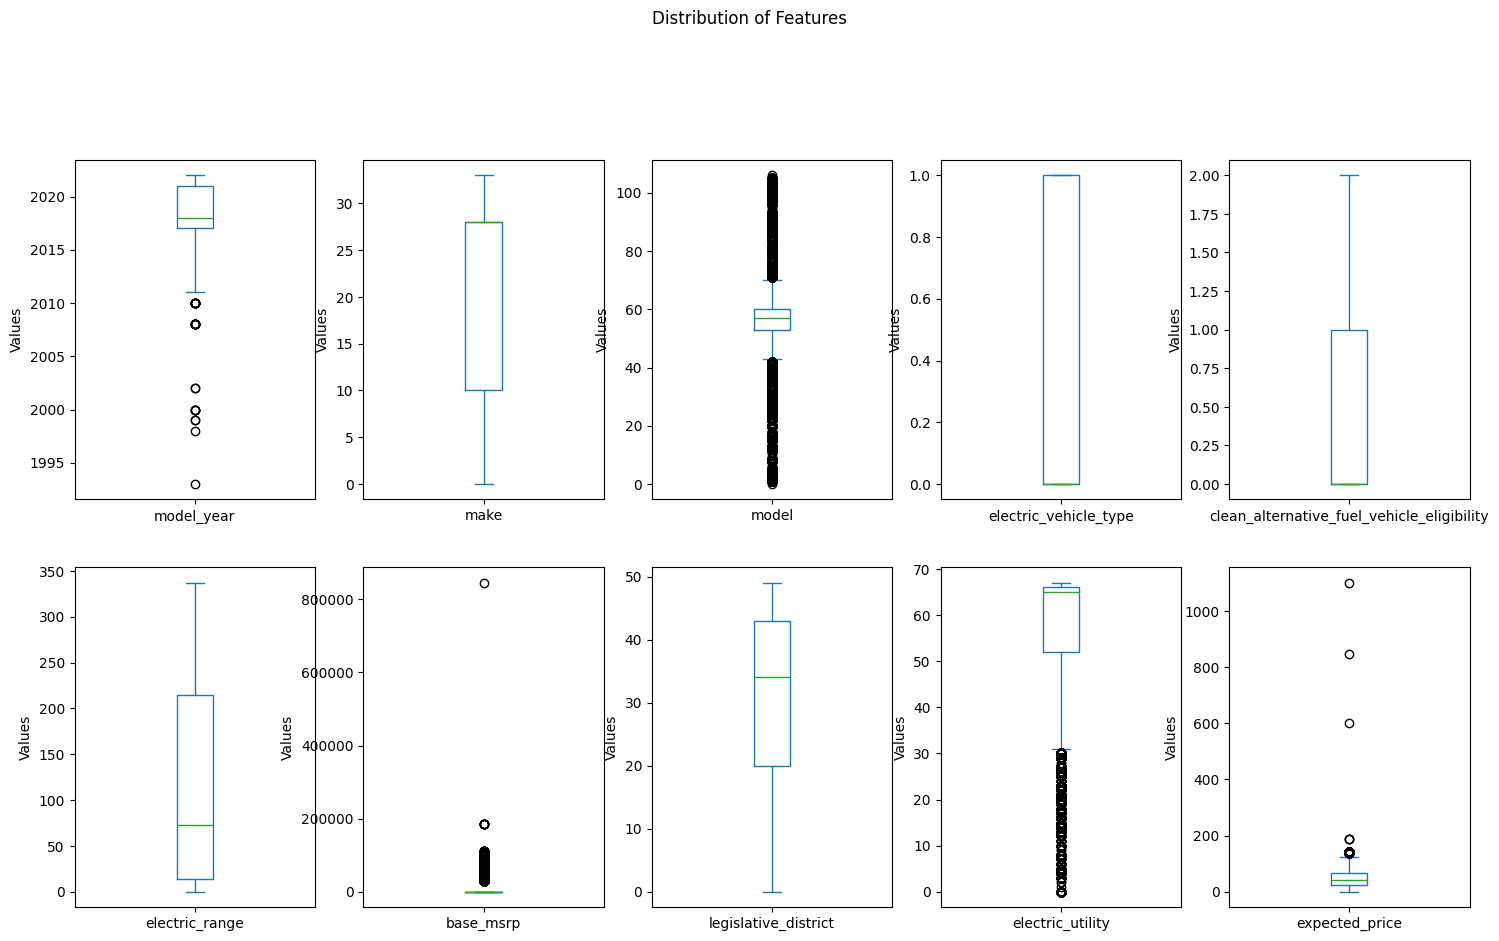

In [80]:
# Create a boxplot to see the distribution of data basing on the upper and lower percentiles
df.plot(kind ='box', subplots=True, figsize=(18,15), layout =(3,5), ylabel='Values', title='Distribution of Features')
plt.show()

From the boxplot, the state, zip_code, model_year, model, base_msrp, vehicle_location and electric_utility have many outliers

In [81]:
outlier_cols = ['model_year', 'model', 'base_msrp','electric_utility', 'expected_price']

#### Standardize data
* Let's standardize the data to since the features have different varying ranges which might reduce the accuracy of the model - varying ranges increases distance between values
* We'll use the standard scaler since it's best for SVM models

In [82]:
# Using StandardScaler to scale our data - we'll remove the expected_price given it's our target column
new_df = df.copy()
categorical_cols.append('expected_price')

In [83]:
# Remove expected price and the other categorical cols since the former is our target and the rest are categorical columns that we've encoded
std_df = new_df.drop(categorical_cols, axis=1)
standard_scaler = StandardScaler().fit(std_df)
std_df = pd.DataFrame(standard_scaler.transform(std_df), columns=std_df.columns)

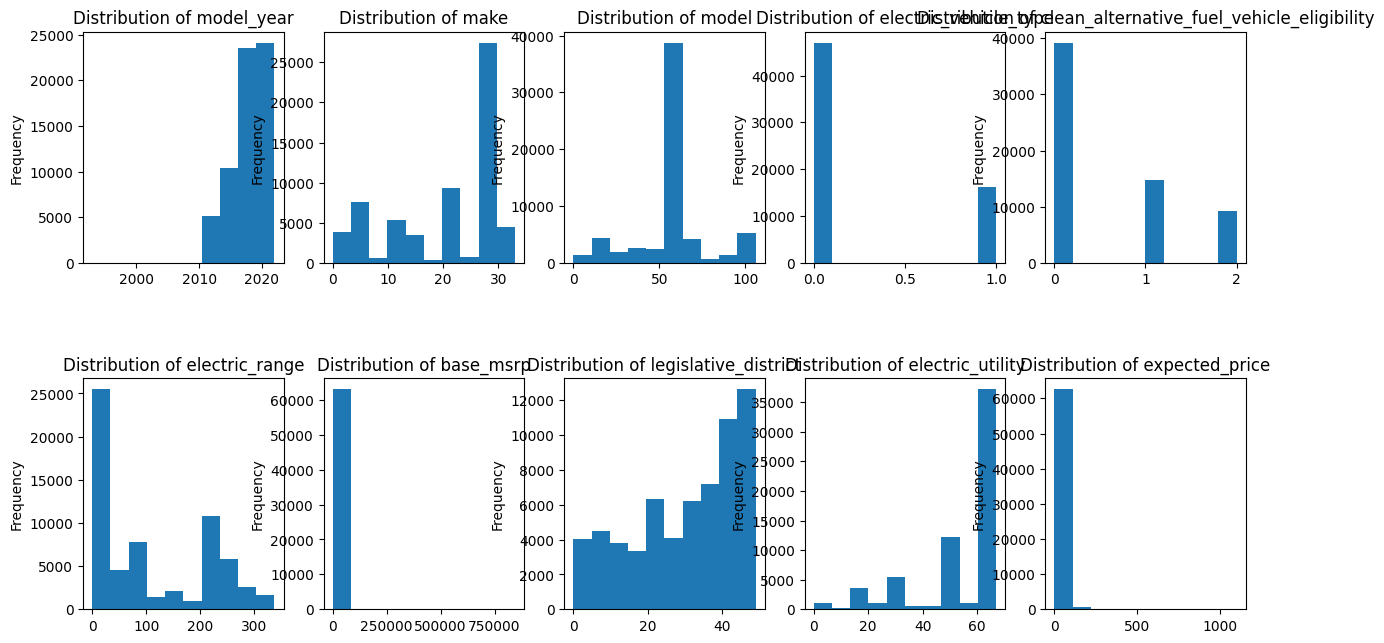

In [84]:
# Showing the distribution of data on the columns with standardized data
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(new_df.columns):
    ax = plt.subplot(3,5, i + 1)
    new_df[col].plot.hist(ax=ax)
    ax.set_title('Distribution of {}'.format(col))
    ax.set_xlabel("")

In [86]:
new_df[std_df.columns] = std_df

In [89]:
new_df.head()

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,base_msrp,legislative_district,electric_utility,expected_price
0,0.665378,28,57.0,0,0,1.929794,-0.203542,0.132376,65,50.00
1,-2.637051,22,53.0,0,0,-0.327384,-0.203542,0.677880,65,15.00
2,-1.169305,3,45.0,0,0,-0.250544,-0.203542,-0.208564,31,18.00
3,-1.903178,5,70.5,1,0,-0.663559,-0.203542,1.018819,66,33.90
4,0.298441,5,42.5,0,0,1.257443,-0.203542,-0.344939,31,41.78


#### Using IQR to handle the outliers

In [87]:
def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    inter_quartile_range = Q3 - Q1
    upper_limit = Q3 + (1.5*inter_quartile_range)
    lower_limit = Q1 - (1.5*inter_quartile_range)
    return upper_limit, lower_limit

In [88]:
for col in outlier_cols:
    UL, LL = outlier_limits(new_df[col])
    new_df.loc[(new_df[col] > UL), col] = UL
    new_df.loc[(new_df[col] < LL), col] = LL

/var/folders/mk/pdjmq76j5h1b0nv4v9ys81cr0000gn/T/ipykernel_16666/1024057275.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df[col] > UL), col] = UL


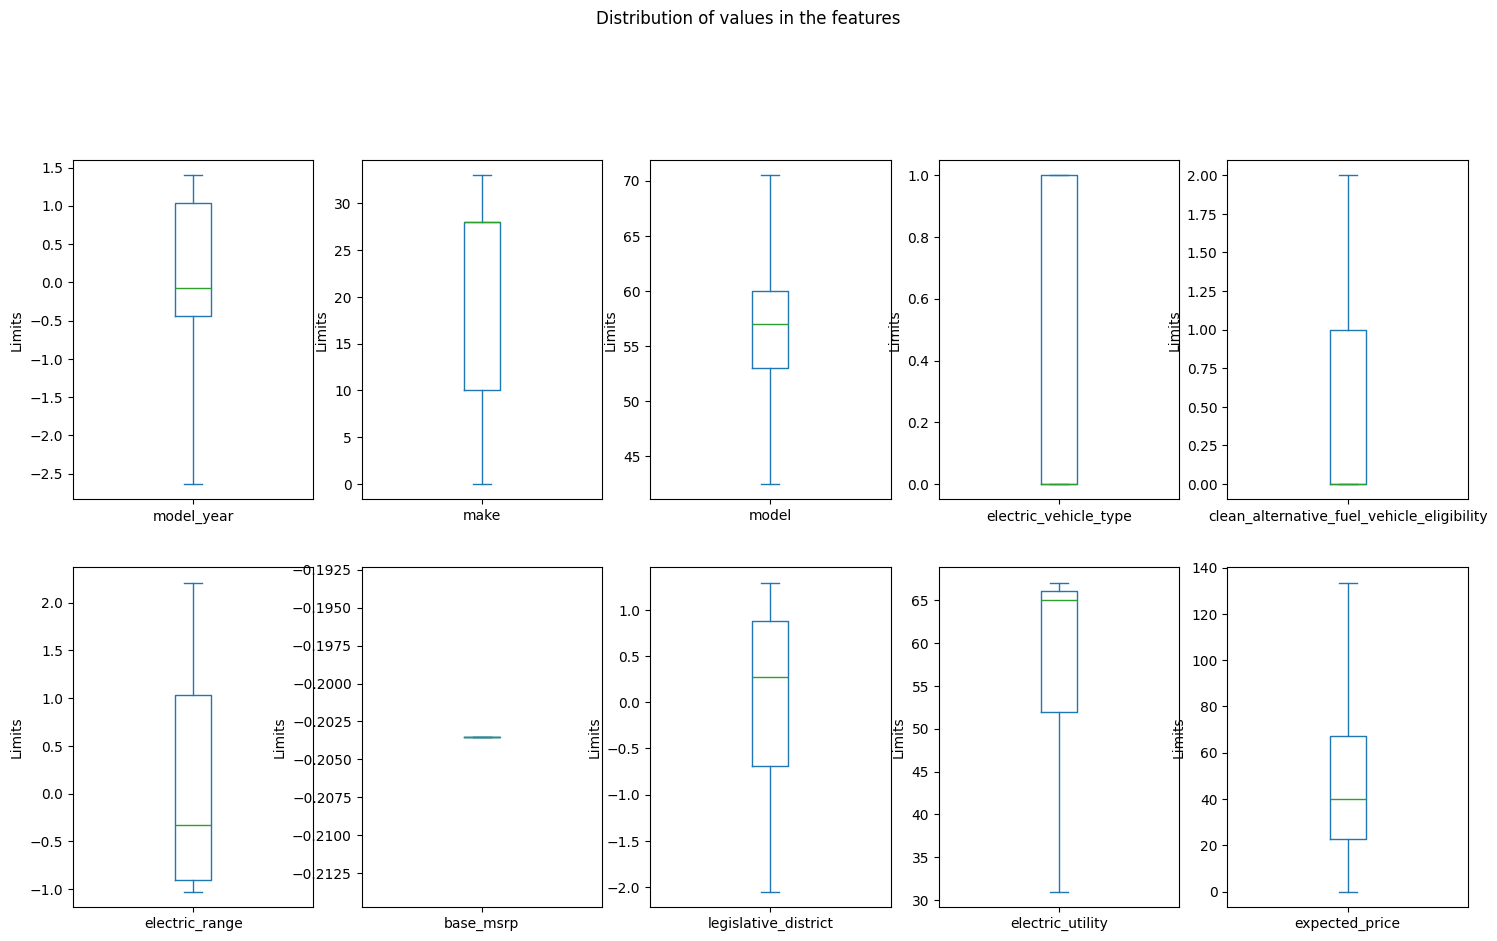

In [90]:
# Create a boxplot to see the distribution of data basing on the upper and lower percentiles
new_df.plot(kind ='box', subplots=True, figsize=(18,15), layout =(3,5), ylabel='Limits', title='Distribution of values in the features')
plt.show()

### Step 4: Training our model

#### Let's check how the data correlates with each other to help us choose our target and columns

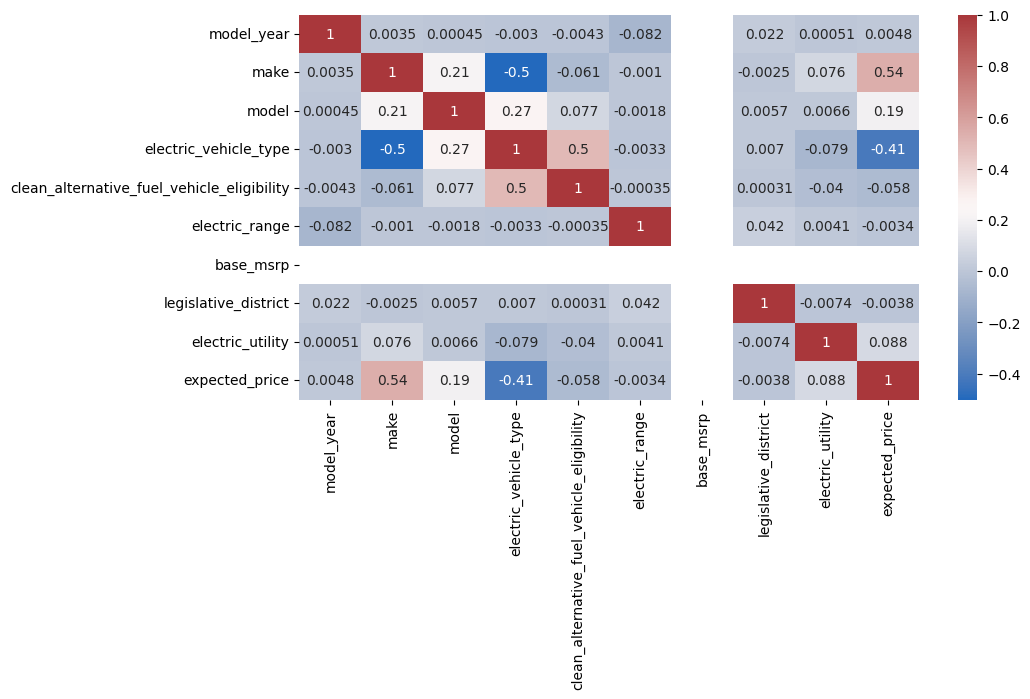

In [91]:
# Checking the correlation of the columns in our data
plt.figure(figsize=(10,5))
sns.heatmap(data = new_df.corr(), annot=True, cmap='vlag')
plt.show()

* Since we want to predict the expected price, which is a continuous value we can set it as our target
* The make, model have a positive correlation with the electric_vehicle_type, have a negative correlation. Let's choose them as our features since they have an noticeable impact on the price

#### Feature Selection

In [94]:
X = new_df[['model', 'make', 'electric_vehicle_type']]
y = new_df['expected_price']

#### Split our train & test data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Training our data using the SVM Regression model

In [97]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [98]:
# Make predictions
y_pred = model.predict(X_test)

In [99]:
# Predictions
model_diff = pd.DataFrame({
    'Actual price' : y_test,
    'Predicted price': y_pred
})
model_diff

,Actual price,Predicted price
55501,16.365,16.710869
39759,24.690,29.897499
13984,73.000,67.375717
57786,69.000,63.900511
16059,62.000,65.368568
...,...,...
6202,29.998,29.897499
54955,73.000,67.375717
56918,26.220,16.457495
56784,35.000,35.864056


#### Evaluation of model performance

In [100]:
# Using mse and r2_Score
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print('Mean Squared Error', mse)
print('R2 Score', r2score)

Mean Squared Error 266.53011509466774
R2 Score 0.5360432136766238


The r2 score is 0.53 which means the model achieves a 53% prediction hence we need to improve on it. We are aiming to achieve an r2 score above 0.7 and lower the mean square error to be near 0